In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_analysis import data_analysis

In [2]:
class project():
    def __init__(self):
        self.data = data_analysis()

    def gerar_dfnormalizado(self):
        df = self.data.read_file()
        df = self.data.log_valores(df)
        df = self.data.gerar_dummies(df) 

        self.data.plot_boxplot(df)
        self.data.plot_histograma(df)

        df = df.drop(['frequencia', 'recencia_valor', 'valor/freq'], axis=1)
        # df = self.data.normalizar_minmax(df)     
        df = df.replace({True: 1, False:0})
        return df     
    
    def gerar_indices(self):
        df = self.gerar_dfnormalizado()
        df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = self.data.fracionar_df(df)
        df_alimentar = self.data.indice_RFV(df_alimentar)
        df_ecommerce = self.data.indice_RFV(df_ecommerce)
        df_hospitalar = self.data.indice_RFV(df_hospitalar)
        df_varejo_direto = self.data.indice_RFV(df_varejo_direto)
        df_varejo_indireto = self.data.indice_RFV(df_varejo_indireto)
        return df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto


In [3]:
run = project()

c:\ProgramData\anaconda3\envs\ds-3.8\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


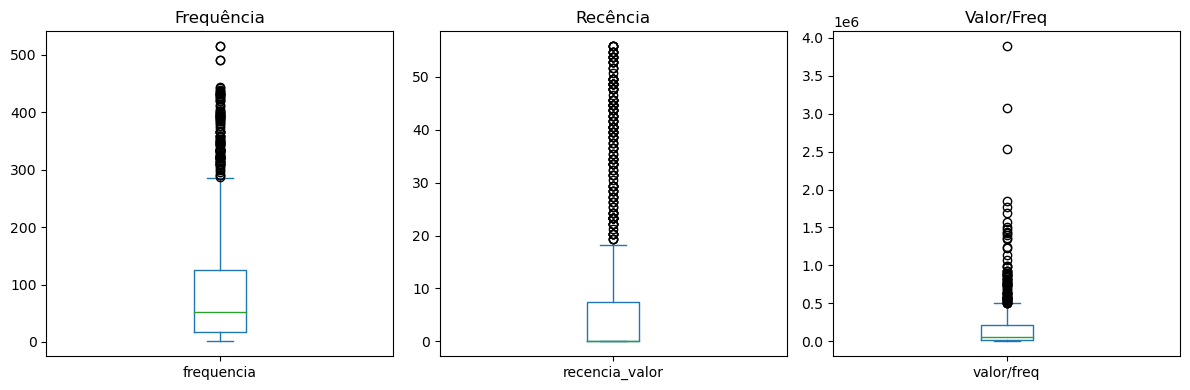

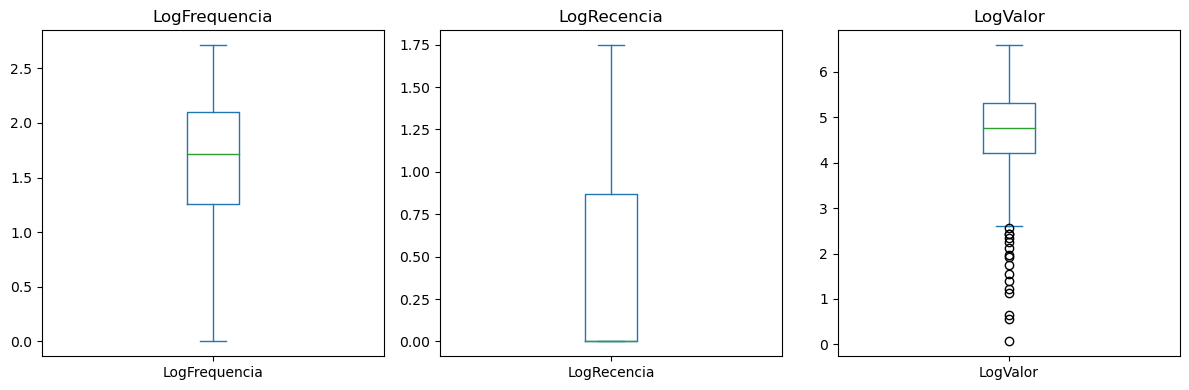

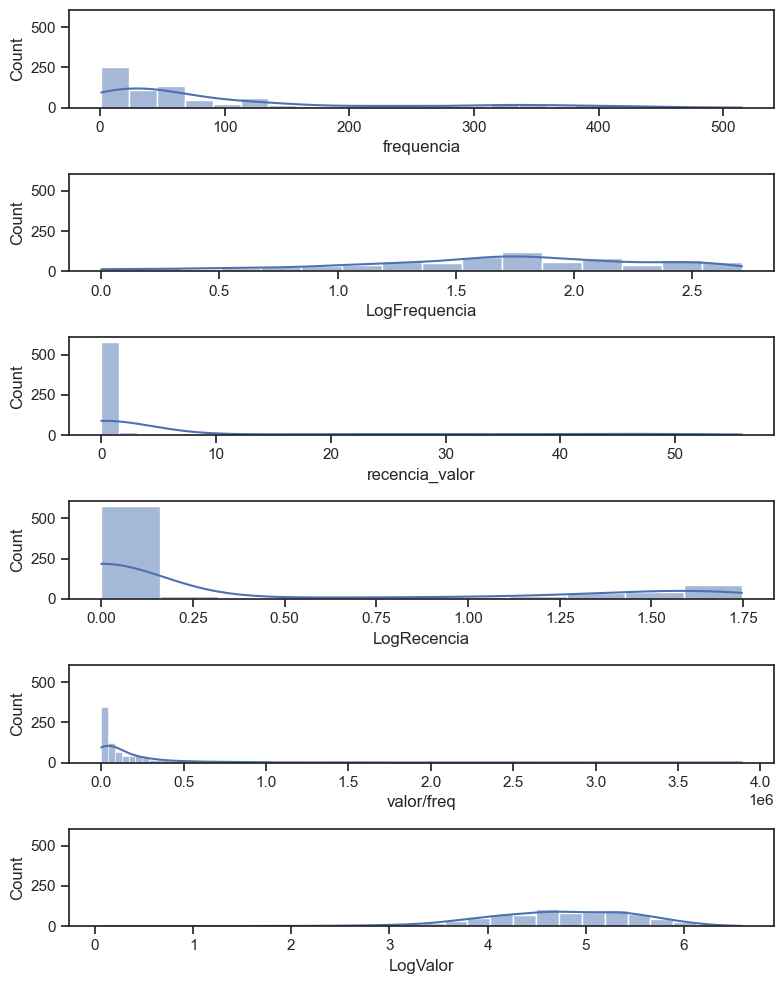

In [4]:
df_alimentar, df_ecommerce, df_hospitalar, df_varejo_direto, df_varejo_indireto = run.gerar_indices()

In [6]:
df_alimentar

,LogFrequencia,LogRecencia,LogValor,canal_ALIMENTAR,canal_E-COMMERCE,canal_HOSPITALAR,canal_VAREJO DIRETO,canal_VAREJO INDIRETO,Tercil_Freq,Tercil_Valor,Tercil_Recencia
rede_uf,,,,,,,,,,,
ELOFARMA-UNILIDER GRUPO ELO - RJ,1.919078,0.000000,5.998647,1,0,0,0,0,3,3,3
REDE MARTINS CO - MG,1.785330,0.000000,5.964208,1,0,0,0,0,3,3,3
ARCOM SA - MG,1.579784,0.000000,5.938271,1,0,0,0,0,2,3,3
SENDAS - SP,1.690196,0.000000,5.882121,1,0,0,0,0,3,3,3
TOP SERVICE DISTR DE PROD CONSUMO - SP,1.929419,0.000000,5.855043,1,0,0,0,0,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
FEM DISTRIBUIDORA E IMP LTDA - SP,1.204120,1.367356,3.450624,1,0,0,0,0,1,1,1
JORGE BATISTA E CIA LTDA - PI,2.525045,0.000000,3.170769,1,0,0,0,0,3,1,3
JORGE BATISTA E CIA LTDA - MA,2.562293,0.000000,3.167717,1,0,0,0,0,3,1,3
